## Motivation

## Setup

In [1]:
# set up environment
suppressMessages({
library(scUnify)
library(clustree)
library(reticulate)
setwd("/nemo/lab/caladod/working/Matthew/project/matthew/MH_GSE247917")})

# import seurat object
obj <- qread("seurat/1_processing/1.4_GSE247917_qc.qs")

Warning message:
“replacing previous import ‘cowplot::get_legend’ by ‘ggpubr::get_legend’ when loading ‘scUnify’”
Warning message:
“replacing previous import ‘cowplot::align_plots’ by ‘patchwork::align_plots’ when loading ‘scUnify’”
Warning message:
“replacing previous import ‘biomaRt::select’ by ‘rstatix::select’ when loading ‘scUnify’”
Warning message:
“replacing previous import ‘scales::viridis_pal’ by ‘viridis::viridis_pal’ when loading ‘scUnify’”


In [2]:
# inspect seurat object
obj

An object of class Seurat 
23961 features across 36850 samples within 5 assays 
Active assay: RNA (23560 features, 0 variable features)
 2 layers present: counts, data
 4 other assays present: HTO, ADT, BCR, TCR

## Cell Cycle Scoring

In [3]:
obj <- calculate_cellcycle(obj, org = "human", remove_genes = F, assay = "RNA")

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


In [4]:
head(obj)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,nCount_ADT,nFeature_ADT,samples,pct.mt,pct.rb,⋯,nCount_BCR,nFeature_BCR,nCount_TCR,nFeature_TCR,hardqc,softqc,finalqc,S.Score,G2M.Score,Phase
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
CV10_AAACCTGAGAAGCCCA-1,SeuratProject,2075,1226,91,3,1336,58,CV10,2.602410,11.036145,⋯,0,0,0,0,Fail,Pass,Pass,-0.01487464,0.031815119,G2M
CV10_AAACCTGAGAGGGATA-1,SeuratProject,4110,2205,257,3,1008,57,CV10,4.449307,7.537078,⋯,1,1,2,2,Fail,Pass,Pass,-0.09264527,-0.012183872,G1
CV10_AAACCTGAGAGTGACC-1,SeuratProject,1216,785,88,2,829,57,CV10,3.201970,18.226601,⋯,0,0,2,1,Pass,Pass,Pass,-0.04760012,-0.089796123,G1
CV10_AAACCTGAGATATGGT-1,SeuratProject,6005,2865,599,4,3661,57,CV10,5.706205,5.905839,⋯,3,2,3,2,Fail,Fail,Fail,-0.04125181,-0.029838993,G1
CV10_AAACCTGAGCCAGTAG-1,SeuratProject,1318,774,70,3,1216,58,CV10,3.479576,23.146747,⋯,0,0,4,3,Pass,Pass,Pass,-0.04531868,-0.038159736,G1
CV10_AAACCTGAGCGATATA-1,SeuratProject,1739,1131,84,4,700,57,CV10,4.016064,6.368330,⋯,0,0,4,3,Pass,Pass,Pass,0.04950195,-0.085206015,S
CV10_AAACCTGAGGAATCGC-1,SeuratProject,2882,1614,147,3,1479,58,CV10,3.561549,13.105118,⋯,0,0,10,3,Fail,Pass,Fail,0.08823207,-0.075590720,S
CV10_AAACCTGAGTCAAGCG-1,SeuratProject,1257,807,108,2,1063,55,CV10,3.179650,17.170111,⋯,0,0,1,1,Fail,Fail,Fail,0.04558087,0.065000581,G2M
CV10_AAACCTGAGTGGAGTC-1,SeuratProject,1910,1305,62,4,20921,58,CV10,2.815433,9.489051,⋯,4,3,4,4,Pass,Pass,Fail,-0.06567529,0.005175199,G2M


## Find Variable Features
Here we will use "RNA" assay and use the top 2000 variable features (~10% of all features) to perform clustering analysis.

In [5]:
# select assay and nfeatures to use
assay <- "RNA"
nfeatures = 2000

Finding variable features for layer counts



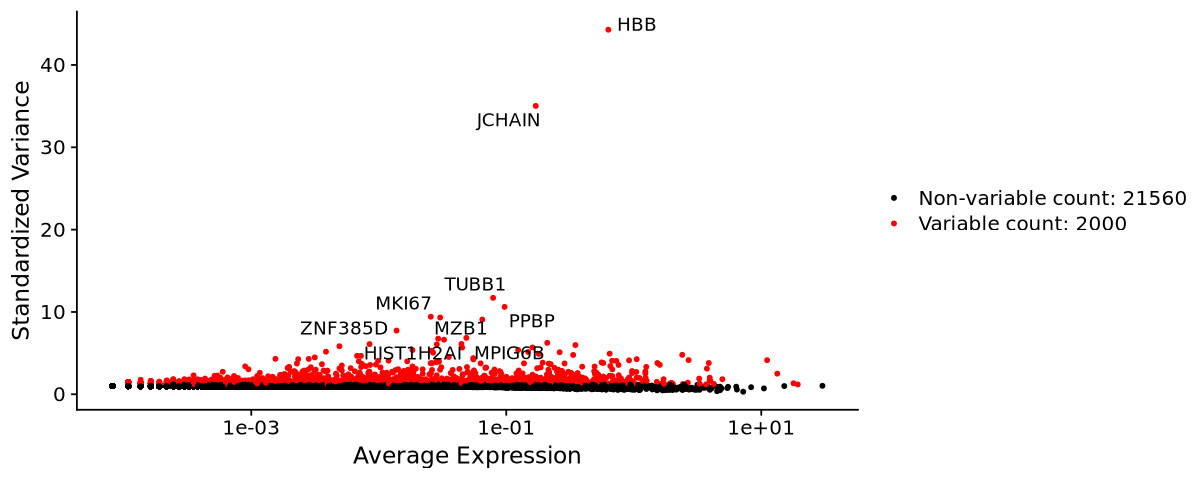

In [6]:
# show top 2000 variable features
options(repr.plot.width=10, repr.plot.height=4)
DefaultAssay(obj) <- assay
obj <- FindVariableFeatures(obj, nfeatures = nfeatures)
VariableFeaturePlot(obj) +
    geom_text_repel(data = VariableFeaturePlot(obj)$data %>% 
        rownames_to_column("gene") %>%
        slice_max(n = 10, order_by = variance.standardized) %>%
        as.data.frame(), aes(label = gene))

## Batch Correction
We will use Seurat V4 RPCA integration method to correct for batch effects between CV10 and CV12. See next section [@chapter-integration] on selecting and evaluating different integration methods.

In [7]:
# run wrapper function to perform seurat RPCA integraton
obj <- integrate_v4(obj, split.by = "samples", assay = assay, nfeatures = nfeatures, vars.to.regress = c("S.Score", "G2M.Score"), method = "rpca", k.weight = 100)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 21883 by 19484

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 383 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 21883 genes

Computing corrected count matrix for 21883 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.443835 mins

Determine variable features

Regressing out S.Score, G2M.Score

Centering data matrix

Getting residuals for block 1(of 4) for counts dataset

Getting residuals for block 2(of 4) for counts dataset

Getting residuals for block 3(of 4) for counts dataset

Getting residuals for block 4(of 4) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Set 

  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ACTATCTGTATATGAG-1 .. CV10_ATGTGTGGTATTCTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ATGTGTGGTCGACTAT-1 .. CV10_CATTATCAGGTCATCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CATTATCAGTACGATA-1 .. CV10_CGGAGTCTCTCTTGAT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CGGAGTCTCTTAGCCC-1 .. CV10_CTTAACTTCGAATGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CTTAACTTCGCCATAA-1 .. CV10_GCCTCTACAATCAGAA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GCCTCTACACAGCCCA-1 .. CV10_GTACGTATCTGGTATG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GTACTCCAGACTCGGA-1 .. CV10_TATCAGGTCTTGCATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_TATCAGGTCTTGGGTA-1 .. CV10_TGGACGCAGCCCAATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 1484 cells: CV10_TGGACGCAGCGACGTA-1 .. CV10_TTTGTCATCTTTAGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%
[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”
sct.model: counts on 2000 cells: CV12_AAACCTGAGAGCCTAG-1 .. CV12_ACTTACTGTTTACTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_ACTTACTTCAATCACG-1 .. CV12_CAAGATCCAAGCTGTT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CAAGATCCAATGAAAC-1 .. CV12_CCTAAAGGTGGAAAGA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CCTAAAGGTGTCAATC-1 .. CV12_CTCACACAGGTACTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CTCACACAGTGGGCTA-1 .. CV12_GATCGTATCACGGTTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GATCGTATCATACGGT-1 .. CV12_GGGATGACAGCTATTG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GGGATGACAGCTCGCA-1 .. CV12_TACTTGTGTCGGCTCA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_TACTTGTGTCTCTTAT-1 .. CV12_TGCTGCTTCGCCCTTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%


sct.model: counts on 1366 cells: CV12_TGCTGCTTCGGCGCTA-1 .. CV12_TTTGTCATCTGCCCTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12868 genes



  |======================================================================| 100%
[1] 2


Warning message:
“Different cells and/or features from existing assay SCT”
Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.1 GiB”
Warning message:
“Assay integrated changing from Assay to SCTAssay”
Warning message:
“Different cells and/or features from existing assay SCT”


## Principal Component Analysis

PC_ 1 
Positive:  IL7R, MALAT1, RPS12, CD3E, LTB, RPS3, IL32, LEF1, TCF7, INPP4B 
	   ETS1, RPL5, EEF1A1, NKG7, CAMK4, RPL10, RPL13, NELL2, RPS27A, CCL5 
	   RPL3, IL2RG, RPL4, IFITM1, ITK, GNLY, CD69, PDE3B, DDX5, CD247 
Negative:  LYZ, S100A9, FTL, IFI30, CD74, PSAP, FOS, S100A8, VCAN, FTH1 
	   CST3, FCN1, CTSS, SAT1, NAMPT, TYROBP, CYBB, AIF1, SERPINA1, HLA-DRA 
	   NEAT1, S100A6, TNFAIP2, VIM, MNDA, S100A11, PLXDC2, SPI1, CD36, S100A4 
PC_ 2 
Positive:  GNLY, NKG7, PRF1, CCL5, CTSW, CX3CR1, GZMB, FCGR3A, FGFBP2, CST7 
	   MYOM2, CD247, SPON2, KLRD1, IL2RB, SYNE1, GZMA, TGFBR3, FLNA, KLRF1 
	   ADGRG1, PRSS23, ITGB2, AOAH, GZMH, PTGDS, S1PR5, PFN1, SH2D1B, PYHIN1 
Negative:  RPS12, RPLP1, RPL13, RPL10, RPS8, TPT1, IL7R, RPL32, AL138963.4, EEF2 
	   EEF1A1, RPL4, LTB, RPL11, RPS14, RPS18, RPL18A, RPL30, LEF1, RPS23 
	   RPS3A, RPS3, RPL28, RPLP0, RPS27A, RPS13, RPL19, RPL34, RPS15A, RPL29 
PC_ 3 
Positive:  CD74, BANK1, MS4A1, FCRL1, HLA-DRA, AFF3, RALGPS2, CD79A, HLA-DPB1, HLA-DQA1

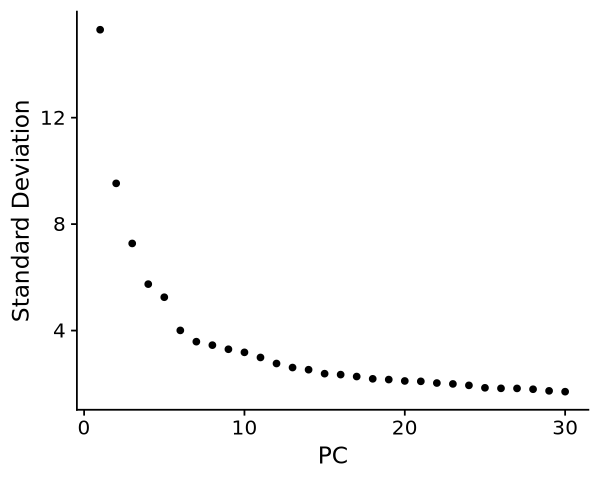

In [8]:
options(repr.plot.width=5, repr.plot.height=4)
obj <- RunPCA(obj)
ElbowPlot(obj, ndims = 30, reduction = "pca")

## UMAP Projection

In [9]:
obj <- RunUMAP(obj, dims = 1:7, reduction = "pca", reduction.name = "umap", assay = "integrated", verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



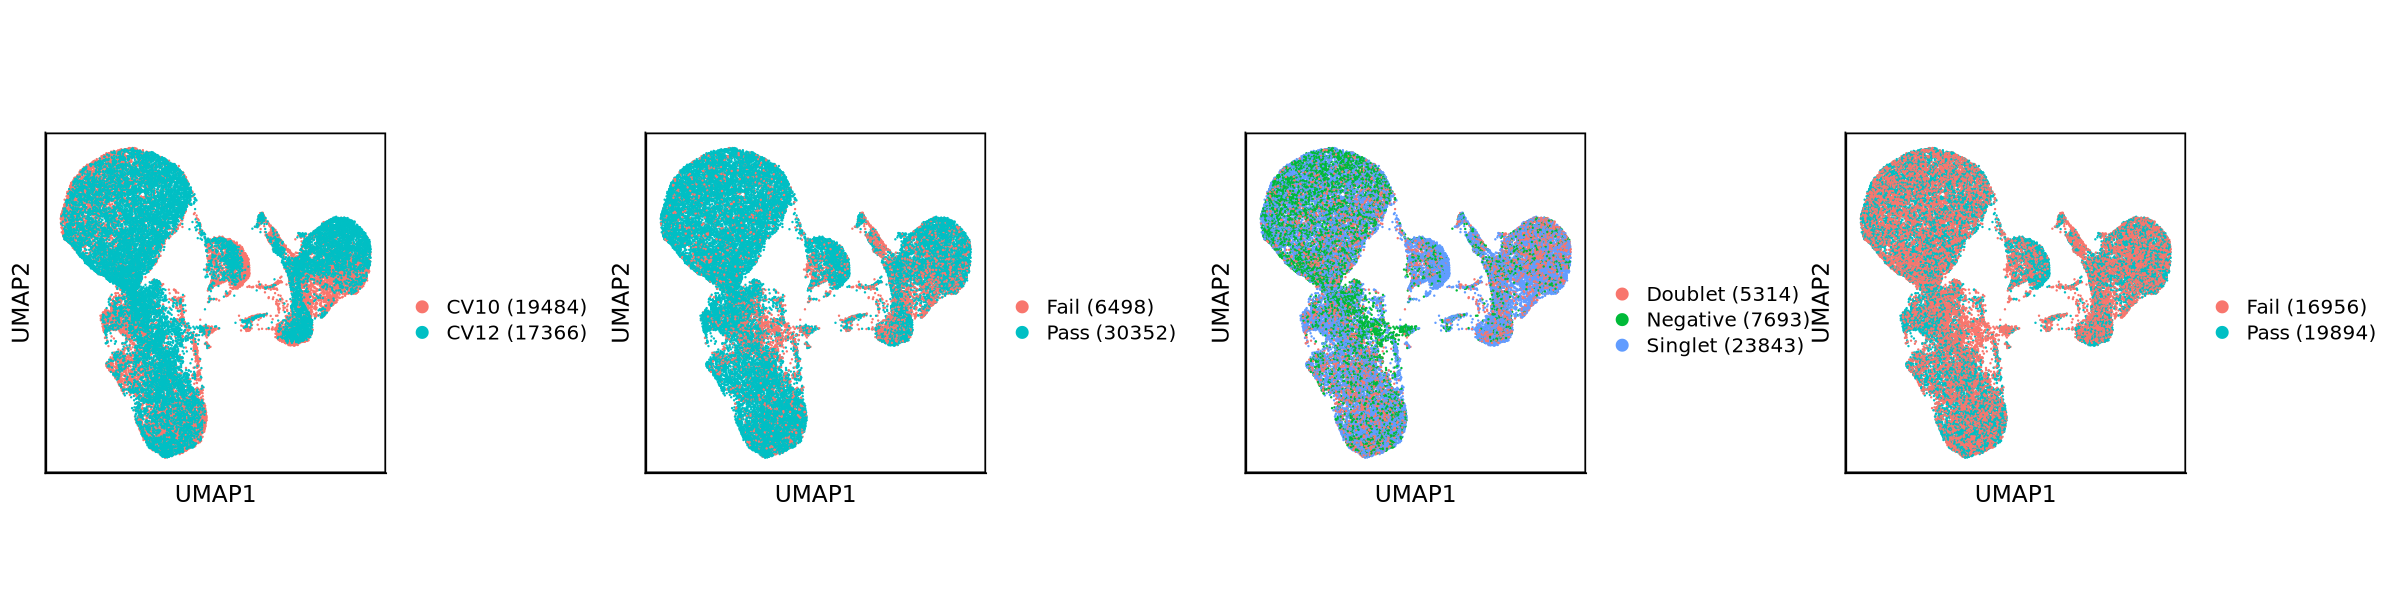

In [10]:
options(repr.plot.width=20, repr.plot.height=5)
p1 <- scUMAP(obj, reduction = "umap", group.by = "samples", count = T)
p2 <- scUMAP(obj, reduction = "umap", group.by = "softqc", count = T)
p3 <- scUMAP(obj, reduction = "umap", group.by = "MULTI.global", count = T)
p4 <- scUMAP(obj, reduction = "umap", group.by = "finalqc", count = T)
plot_grid(p1, p2, p3, p4, ncol = 4, align = "hv")

## Find Clusters

In [11]:
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:7, verbose = F)

### Louvain Algorithm

In [12]:
obj <- FindClusters(obj, resolution = seq(0.1, 1, 0.1), algorithm = 1, verbose = F)

In [13]:
cols <- paste0("integrated_snn_res.", seq(0.1, 1, 0.1))
for(i in cols){
    obj@meta.data[[gsub("integrated_snn_res.", "louvain_", i)]] <- obj@meta.data[[i]]
    obj@meta.data[[i]] <- NULL}
clustree <- clustree(obj@meta.data, prefix = paste0("louvain_"))

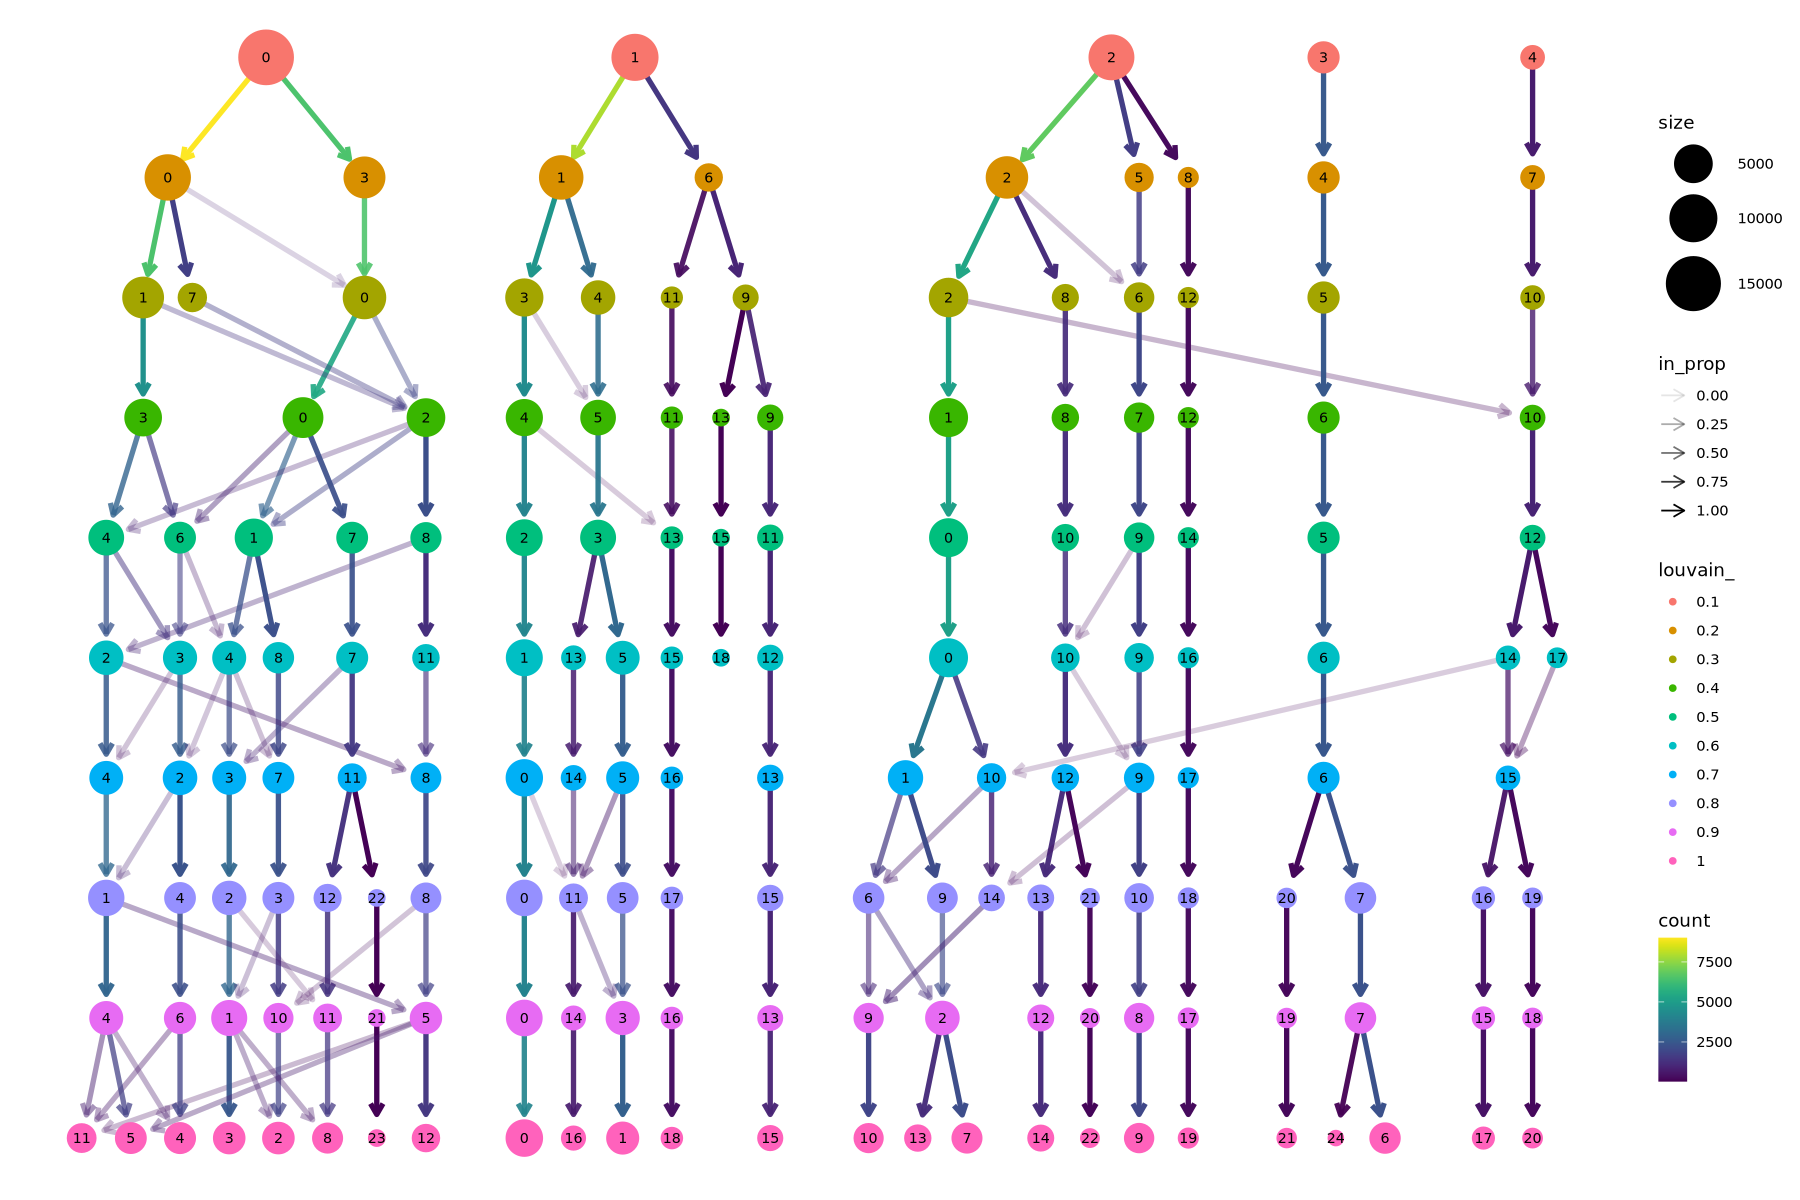

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
print(clustree)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


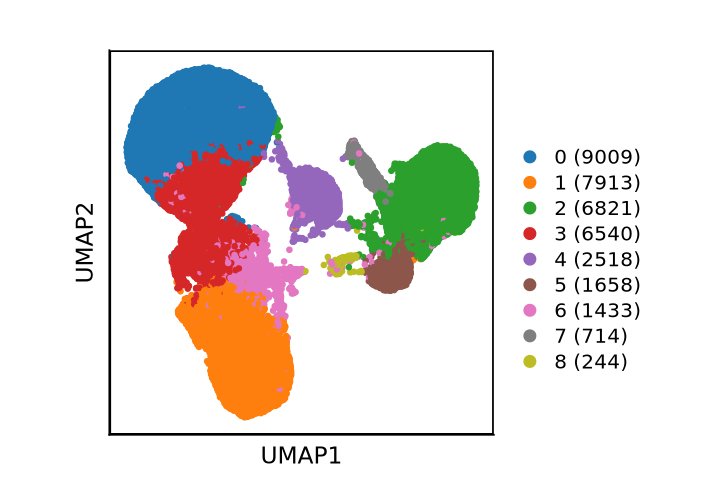

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "louvain_0.2", count = T, pt.size = 1.2, cols = palette_list[["vega_10"]])

### Leiden Algorithm
Leiden algorithm has been shown to outperform traditional louvain algorithm (see [citation]()).

In [ ]:
use_condaenv("/camp/home/hungm/.conda/envs/r-reticulate")
obj <- FindClusters(obj, resolution = seq(0.1, 1, 0.1), algorithm = 4, verbose = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 10.1 GiB”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integer range”
Warning message in paste("reticulate", module, "load", sep = "::"):
“NAs introduced by coercion to integ

In [ ]:
cols <- paste0("integrated_snn_res.", seq(0.1, 1, 0.1))
for(i in cols){
    obj@meta.data[[gsub("integrated_snn_res.", "leiden_", i)]] <- obj@meta.data[[i]]
    obj@meta.data[[i]] <- NULL}
clustree <- clustree(obj@meta.data, prefix = paste0("leiden_"))

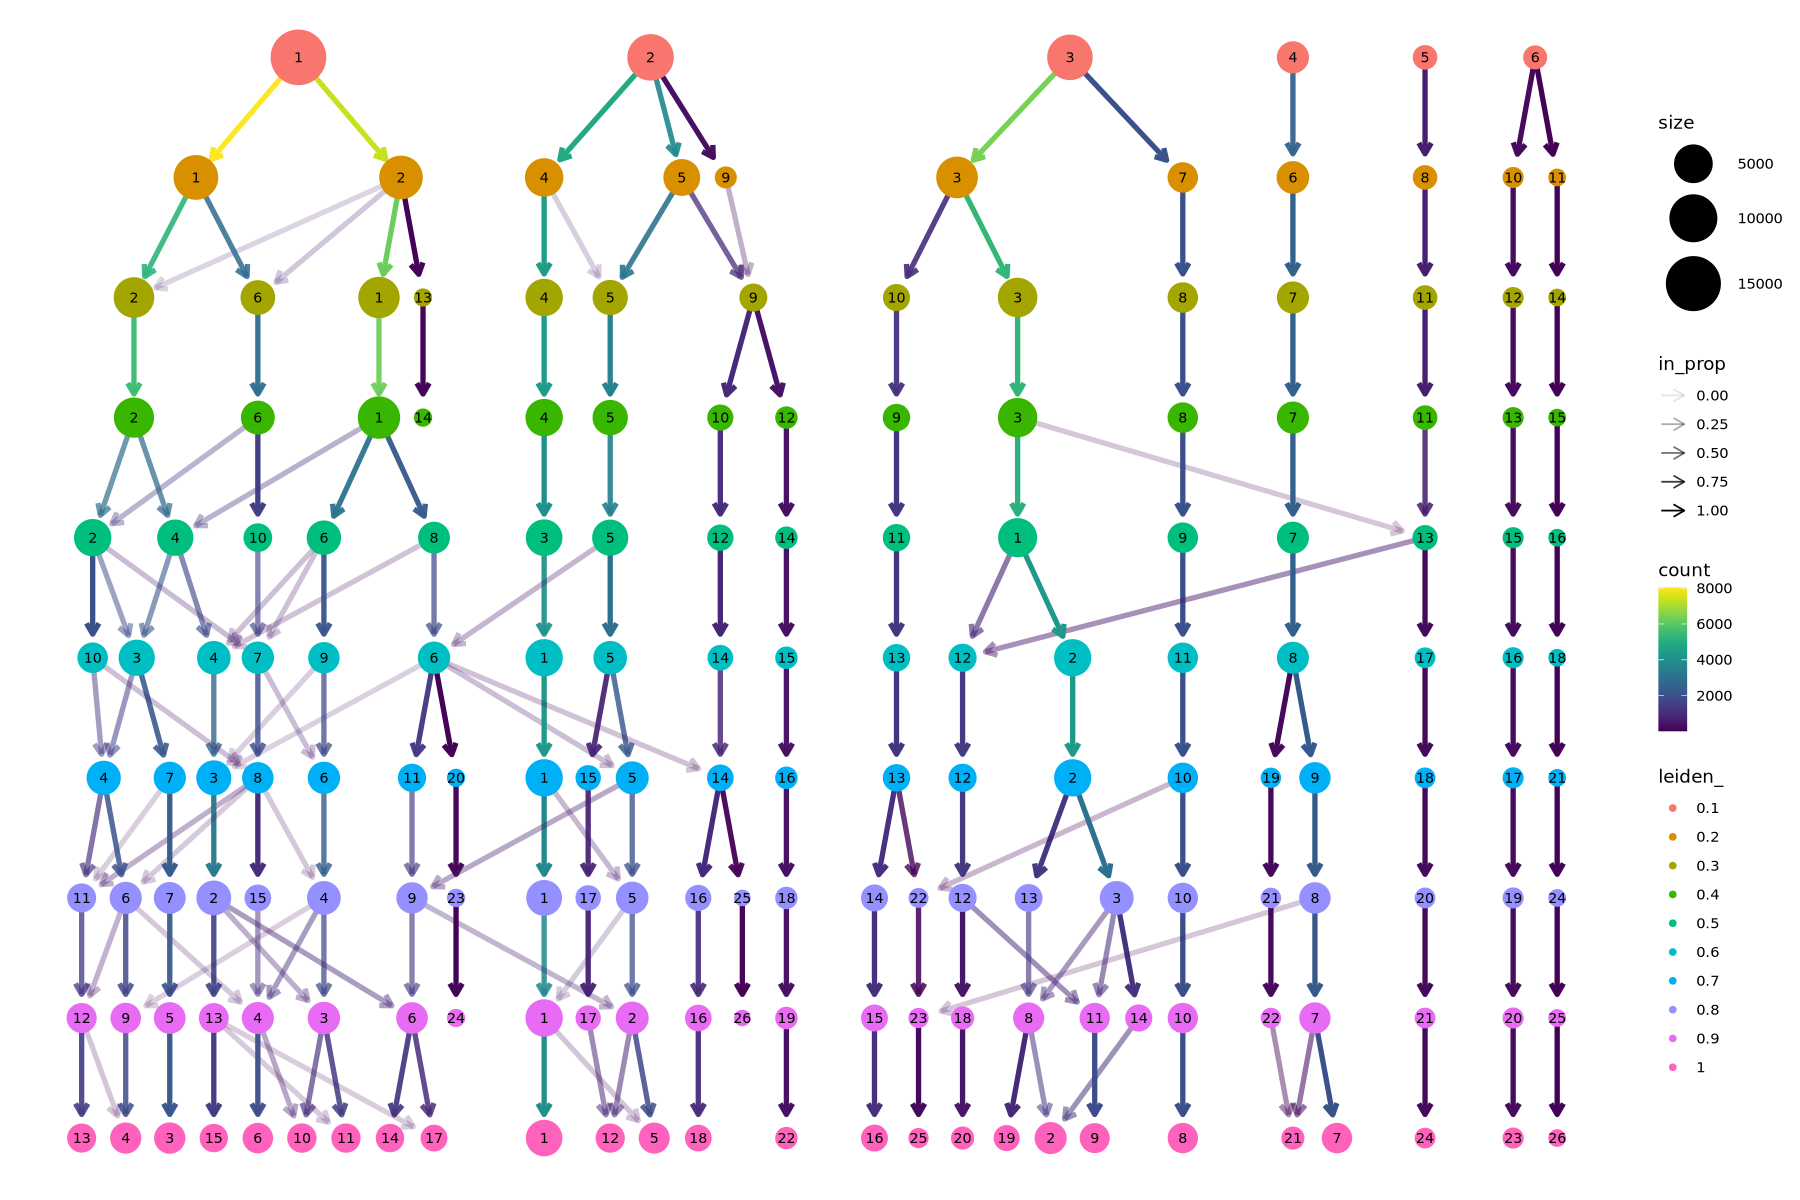

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
print(clustree)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


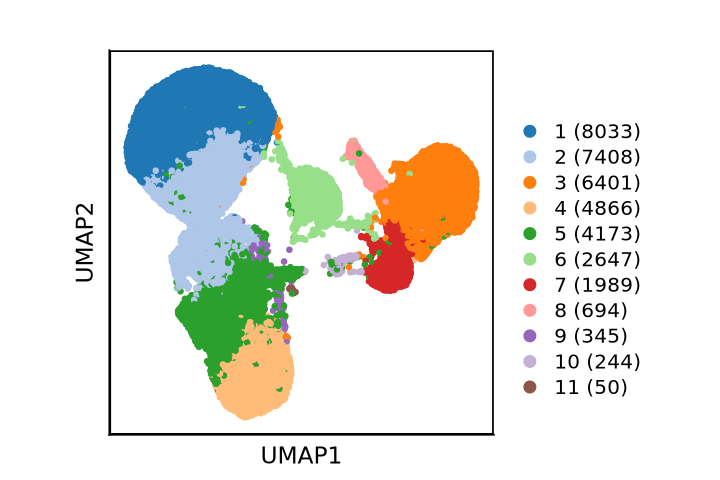

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "leiden_0.2", count = T, pt.size = 1.2, cols = palette_list[["vega_20"]])

In [21]:
qsave(obj, "seurat/1_processing/1.5_GSE247917_clustering.qs")

## Session Info {.unnumbered}

In [ ]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nemo/lab/caladod/working/Matthew/.conda/envs/seurat5/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scUnify_0.0.0.9000          ComplexHeatmap_2.16.0      
 [3] DoubletFinder_2.0.4         scDblFinder_1.14.0         
 [5] celda_1.16.1                Matrix_1.6-1 